# Project 2: Tree predictors for binary classification

Date: 17/02/2025

Student: Vladislav Kovalev 44300A

Approximately within two to three weeks from each deadline, there will be an oral examination where the project will be thoroughly discussed with the TAs. We stress that group projects are not allowed: students must complete their projects individually.


Read the following instructions carefully. Besides complying with the project’s specifications, it is extremely important that students follow a sound methodology both in the data preprocessing phase and when running the experiments. In particular, no data manipulation should depend on test set information. Moreover, hyperparameter tuning should focus on regions of values where performance trade-offs are explicit. Any implementation must use Python 3 (any other choice must be preliminarily agreed with the teaching assistants).

# Primary Mushroom Data

## Sources
1. **Mushroom species drawn from source book**:  
   - Patrick Hardin. *Mushrooms & Toadstools.* Zondervan, 1999.
2. **Inspired by this mushroom data**:  
   - Jeff Schlimmer. *Mushroom Data Set.* April 1987.  
     [Dataset URL](https://archive.ics.uci.edu/ml/datasets/Mushroom)
3. **Repository**:  
   - Python scripts and data sets:  
     [Mushroom Repository](https://mushroom.mathematik.uni-marburg.de/files/)
4. **Author**:  
   - Dennis Wagner
5. **Date**:  
   - 05 September 2020

---

## Relevant Information
- Dataset includes **173 species** of mushrooms with caps from various families.  
- Each species is identified as:  
  - Definitely edible  
  - Definitely poisonous  
  - Of unknown edibility (combined with the poisonous class).  
- Contains **20 variables**:  
  - **17 nominal** and **3 metrical**.  
  - Nominal variables have a set of possible values.  
  - Metrical variables have a range of possible values.

---

## Data Generation
- Python project (Source 3) includes the module `primary_data_generation.py`,  
  which generates the initial data (`primary_data_generated.csv`)  
  from the HTML version of the book (Source 1).  
- The primary data was manually cleaned and enriched,  
  resulting in `primary_data_edited.csv` (used for simulation of secondary data).

---

## Class Information
1. **family**: Name of the mushroom family (*String*, multinomial).  
2. **name**: Name of the mushroom species (*String*, multinomial).  
3. **class**:  
   - Poisonous = `p`  
   - Edible = `e` (*Binary*).

---

## Variable Information
### Metrical Variables (m)
1. **cap-diameter**:  
   - *Float* (cm).  
   - Two values = min/max, one value = mean.
2. **stem-height**:  
   - *Float* (cm).  
   - Two values = min/max, one value = mean.
3. **stem-width**:  
   - *Float* (mm).  
   - Two values = min/max, one value = mean.

### Nominal Variables (n)
1. **cap-shape**:  
   - Bell (`b`), Conical (`c`), Convex (`x`), Flat (`f`), Sunken (`s`),  
     Spherical (`p`), Others (`o`).
2. **cap-surface**:  
   - Fibrous (`i`), Grooves (`g`), Scaly (`y`), Smooth (`s`), Shiny (`h`),  
     Leathery (`l`), Silky (`k`), Sticky (`t`), Wrinkled (`w`), Fleshy (`e`).
3. **cap-color**:  
   - Brown (`n`), Buff (`b`), Gray (`g`), Green (`r`), Pink (`p`), Purple (`u`),  
     Red (`e`), White (`w`), Yellow (`y`), Blue (`l`), Orange (`o`), Black (`k`).
4. **does-bruise-bleed**:  
   - Bruises/Bleeds = `t`, No = `f`.
5. **gill-attachment**:  
   - Adnate (`a`), Adnexed (`x`), Decurrent (`d`), Free (`e`), Sinuate (`s`),  
     Pores (`p`), None (`f`), Unknown (`?`).
6. **gill-spacing**:  
   - Close (`c`), Distant (`d`), None (`f`).
7. **gill-color**:  
   - Same as **cap-color** + None (`f`).
8. **stem-root**:  
   - Bulbous (`b`), Swollen (`s`), Club (`c`), Cup (`u`), Equal (`e`),  
     Rhizomorphs (`z`), Rooted (`r`).
9. **stem-surface**:  
   - Same as **cap-surface** + None (`f`).
10. **stem-color**:  
    - Same as **cap-color** + None (`f`).
11. **veil-type**:  
    - Partial (`p`), Universal (`u`).
12. **veil-color**:  
    - Same as **cap-color** + None (`f`).
13. **has-ring**:  
    - Ring = `t`, None = `f`.
14. **ring-type**:  
    - Cobwebby (`c`), Evanescent (`e`), Flaring (`r`), Grooved (`g`), Large (`l`),  
      Pendant (`p`), Sheathing (`s`), Zone (`z`), Scaly (`y`), Movable (`m`), None (`f`),  
      Unknown (`?`).
15. **spore-print-color**:  
    - Same as **cap-color**.
16. **habitat**:  
    - Grasses (`g`), Leaves (`l`), Meadows (`m`), Paths (`p`), Heaths (`h`),  
      Urban (`u`), Waste (`w`), Woods (`d`).
17. **season**:  
    - Spring (`s`), Summer (`u`), Autumn (`a`), Winter (`w`).

---


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from joblib import Parallel, delayed
from tqdm.notebook import tqdm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Download the Mushroom dataset

In [2]:
primary_df_without_changes = pd.read_csv('/content/primary_data.csv', sep=';')

- The main task of this project is the implementation from scratch of tree predictors for binary classification to determine whether mushrooms are poisonous. The tree predictors must use single-feature binary tests as the decision criteria at any internal node (as seen in the lectures). More precisely, consider thresholds on a single feature in the case of a numerical/ordinal feature or membership tests in the case of a categorical feature. We suggest the following guidelines to aid your work on this project.

## First task
implement a basic class/structure for the nodes of the tree predictors. It should possess the following attributes/procedures:

- A constructor that initializes the node (empty or with given attributes)
Left and right children, which should be nodes themselves
- A flag to check if the node is a leaf
The decision criterion/test used by the current node: it should be a function taking a data point (e.g., a numpy vector) as input and returning a Boolean value as output.

In [3]:
class Node():
    def __init__(
        self,
        feature   = None,
        threshold = None,
        left      = None,
        right     = None,
        is_leaf   = None,
        label     = None
        ):
        """
        Сonstructor that initializes the node.

        :param feature:     name of the cutting feature.
        :param threshold:   the cutting limit.
        :param left:        left child node.
        :param right:       right child node.
        :param is_leaf:     boolean value for type recognition.
        :param label:       label of the leaf.
        """
        self.feature   = feature
        self.threshold = threshold
        self.left      = left
        self.right     = right
        self.is_leaf   = is_leaf
        self.label     = label


## Second task
implement a class/structure for the (binary) tree predictor. It should contain the following attributes/procedures:

- A constructor initializing the tree predictor (possibly passing the information on which decision criteria/tests can be adopted on each single feature)
- A splitting criterion for selecting both the leaf to expand and the decision criterion to adopt in the new internal node (e.g., Gini index, scaled entropy, etc.)
- A stopping criterion to halt the construction of the decision tree. For example, these could be maximum tree depth, maximum number of nodes/leaves, a constraint on the weight of leaves (e.g., number of samples reaching the leaf, entropy/impurity of the leaf), minimum entropy/impurity decrease
- A procedure for training the tree predictor on a given training set
- A procedure to evaluate the tree predictor on a given validation/test set
Feel free to add extra attributes/procedures if deemed necessary for the task.

## Theoretical Foundation

Decision trees are popular methods in machine learning for classification and regression tasks due to their interpretability and simplicity. The key aspects of decision tree learning involve selecting the right splitting criteria and stopping criteria, such as maximum depth or minimum samples in leaves, to prevent overfitting.

### Splitting Criteria

The following splitting criteria were implemented to evaluate the quality of splits:

1. **Gini Impurity**  
   Gini impurity measures the impurity of a node by calculating the probability of a misclassified element if it were randomly chosen. It is given by:
   \[
   Gini(p) = 1 - \sum_{i=1}^{k} p_i^2
   \]
   where \( p_i \) is the probability that a randomly chosen element belongs to class \( i \).

2. **Entropy**  
   Entropy measures the uncertainty or disorder in the dataset. It is calculated as:
   \[
   H(p) = - \sum_{i=1}^{k} p_i \log_2 p_i
   \]
   where \( p_i \) is the probability of an element belonging to class \( i \). While similar to Gini, entropy can be more sensitive to class distributions.

3. **Misclassification Error**  
   This is a simpler criterion that calculates the probability of misclassification:
   \[
   Error(p) = 1 - \max(p_1, p_2, \dots, p_k)
   \]
   where \( p_i \) is the probability of an element belonging to class \( i \).

### Stopping Criteria

To prevent overfitting, the following stopping criteria were used:

- **Maximum Depth (max_depth)** limits the tree's depth.
- **Minimum Samples per Split (min_samples_split)** and **Minimum Samples per Leaf (min_samples_leaf)** limit the size of nodes, which helps avoid overfitting by preventing too detailed splits.

## Model Implementation

The core of the project is the implementation of a decision tree structure, which uses splitting criteria to recursively partition the data. The key steps include:

- Calculating the impurity reduction at each node.
- Choosing the best feature and threshold to split the data.
- Constructing the tree structure with nodes that are either internal (splitting further) or leaves (assigning class labels).

## Hyperparameter Tuning

Hyperparameter optimization was done using **GridSearchCV** to find the best combination of the following parameters:

- **max_depth**: Limits the tree's depth.
- **min_samples_split**: Minimum samples required to split an internal node.
- **min_samples_leaf**: Minimum samples required in a leaf.
- **splitting_criterion**: Criterion used for splitting (Gini, entropy, or misclassification).

These parameters were tuned to balance overfitting and underfitting.


In [10]:
class TreePredictor:
    def __init__(self,
        splitting_criterion="gini",
        max_depth=None,
        max_samples_split=2,
        max_samples_leaf=1,
        min_impurity_decrease=0.0
        ):
        self.splitting_criterion = splitting_criterion
        self.max_depth = max_depth
        self.max_samples_split = max_samples_split
        self.max_samples_leaf = max_samples_leaf
        self.min_impurity_decrease = min_impurity_decrease
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        if len(set(y)) == 1:
            return Node(is_leaf=True, label=y[0])
        if len(X) < self.max_samples_split or depth == self.max_depth:
            return Node(is_leaf=True, label=self._most_common_label(y))

        best_split = self._best_split(X, y)
        if best_split is None:
            return Node(is_leaf=True, label=self._most_common_label(y))

        left_node = self._build_tree(*best_split['left'], depth + 1)
        right_node = self._build_tree(*best_split['right'], depth + 1)

        return Node(feature=best_split['feature'], threshold=best_split['threshold'], left=left_node, right=right_node, is_leaf=False)

    def _best_split(self, X, y):
        best_split = None
        min_criterion_value = float('inf')

        n_samples, n_features = X.shape
        for feature_index in range(n_features):
            possible_values = np.unique(X[:, feature_index])

            for value in possible_values:
                left_mask = X[:, feature_index] <= value
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]

                if len(left_y) < self.max_samples_leaf or len(right_y) < self.max_samples_leaf:
                    continue

                criterion_value = self._calculate_criterion(left_y, right_y)
                impurity_decrease = self._calculate_impurity_decrease(left_y, right_y)

                if criterion_value < min_criterion_value and impurity_decrease >= self.min_impurity_decrease:
                    min_criterion_value = criterion_value
                    best_split = {
                        'feature': feature_index,
                        'threshold': value,
                        'left': (X[left_mask], left_y),
                        'right': (X[right_mask], right_y)
                    }

        return best_split

    def _calculate_criterion(self, left_y, right_y):
        if self.splitting_criterion == "gini":
            return self._gini_impurity(left_y, right_y)
        elif self.splitting_criterion == "entropy":
            return self._entropy(left_y, right_y)
        elif self.splitting_criterion == "misclassification":
            return self._misclassification_error(left_y, right_y)

    def _calculate_impurity_decrease(self, left_y, right_y):
        left_impurity = self._calculate_criterion(left_y, left_y)
        right_impurity = self._calculate_criterion(right_y, right_y)
        total_len = len(left_y) + len(right_y)
        left_prob = len(left_y) / total_len
        right_prob = len(right_y) / total_len
        return (left_impurity * left_prob + right_impurity * right_prob)

    def _gini_impurity(self, left_y, right_y):
        return self._weighted_impurity(left_y, right_y, self._gini)

    def _gini(self, y):
        classes = np.unique(y)
        impurity = 1.0
        for cls in classes:
            prob_cls = np.sum(y == cls) / len(y)
            impurity -= prob_cls ** 2
        return impurity

    def _entropy(self, left_y, right_y):
        return self._weighted_impurity(left_y, right_y, self._entropy_for_node)

    def _entropy_for_node(self, y):
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            prob_cls = np.sum(y == cls) / len(y)
            entropy -= prob_cls * np.log2(prob_cls) if prob_cls > 0 else 0
        return entropy

    def _misclassification_error(self, left_y, right_y):
        return self._weighted_impurity(left_y, right_y, self._misclassification)

    def _misclassification(self, y):
        classes, counts = np.unique(y, return_counts=True)
        majority_class_count = np.max(counts)
        return 1 - majority_class_count / len(y)

    def _weighted_impurity(self, left_y, right_y, impurity_func):
        total_len = len(left_y) + len(right_y)
        left_prob = len(left_y) / total_len
        right_prob = len(right_y) / total_len
        return left_prob * impurity_func(left_y) + right_prob * impurity_func(right_y)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        return [self._predict_single(x, self.tree) for x in X]

    def _predict_single(self, x, node):
        if node.is_leaf:
            return node.label
        if x[node.feature] <= node.threshold:
            return self._predict_single(x, node.left)
        return self._predict_single(x, node.right)

Train the tree predictors adopting at least 3 reasonable criteria for the expansion of the leaves, and at least 2 reasonable stopping criteria. Compute the training error of each tree predictor according to the 0-1 loss.

Perform hyperparameter tuning according to the splitting criteria and the stopping criteria adopted (e.g., tune the threshold on the maximum size of the tree) for at least one of the tree predictors. Keep in mind that the relevant hyperparameter tuning is an important part of the project and must be performed using a sound procedure.

In [11]:
class PipelineTreePredictor(TreePredictor, BaseEstimator, ClassifierMixin):
    def __init__(
        self,
        splitting_criterion="gini",
        max_depth=None,
        max_samples_split=2,
        max_samples_leaf=1,
        min_impurity_decrease=0.0
        ):
        super().__init__(
            splitting_criterion,
            max_depth,
            max_samples_split,
            max_samples_leaf,
            min_impurity_decrease
        )
        self.pipeline = None
        self.preprocessor = None
        self.label_encoder = LabelEncoder()

    def fit(self, X, y):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input data X must be a pandas DataFrame.")

        y_encoded = self.label_encoder.fit_transform(y)
        self.classes_ = self.label_encoder.classes_  # Store classes for compatibility with sklearn

        categorical_features = X.select_dtypes(include=["object"]).columns
        numeric_features = X.select_dtypes(include=["int64", "float64"]).columns

        numeric_transformer = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler())
        ])

        categorical_transformer = Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ])

        self.preprocessor = ColumnTransformer(
            transformers=[
                ("num", numeric_transformer, numeric_features),
                ("cat", categorical_transformer, categorical_features)
            ]
        )

        X_processed = self.preprocessor.fit_transform(X)
        super().fit(X_processed, y_encoded)
        return self

    def predict(self, X):
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input data X must be a pandas DataFrame.")

        X_processed = self.preprocessor.transform(X)
        predicted_labels = super().predict(X_processed)
        return self.label_encoder.inverse_transform(predicted_labels)


In [12]:
class TqdmGridSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = len(self.param_grid)
        total = n_candidates * self.cv
        with tqdm(total=total, desc="GridSearchCV Progress") as pbar:
            def _fit_and_score(
                    estimator,
                    X, y, scorer, train, test,
                    verbose, parameters,
                    fit_params, return_train_score=True,
                    error_score=np.nan):
                result = delayed(super(TqdmGridSearchCV, self)._fit_and_score)(estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score, error_score)
                pbar.update(1)
                return result
            self._fit_and_score = _fit_and_score
            return super().fit(X, y, **fit_params)


In [13]:
def plot_grid_search_results(grid_search):
    results = grid_search.cv_results_
    mean_test_scores = results["mean_test_score"]
    params = results["params"]

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(mean_test_scores)), mean_test_scores, marker="o")
    plt.xticks(range(len(mean_test_scores)), [str(param) for param in params], rotation=90)
    plt.xlabel("Hyperparameters")
    plt.ylabel("Accuracy")
    plt.title("GridSearchCV Results")
    plt.tight_layout()
    plt.show()


GridSearchCV Progress:   0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 5, 'max_samples_leaf': 2, 'max_samples_split': 2, 'splitting_criterion': 'misclassification'}


<ipython-input-13-3eca34117a23>:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


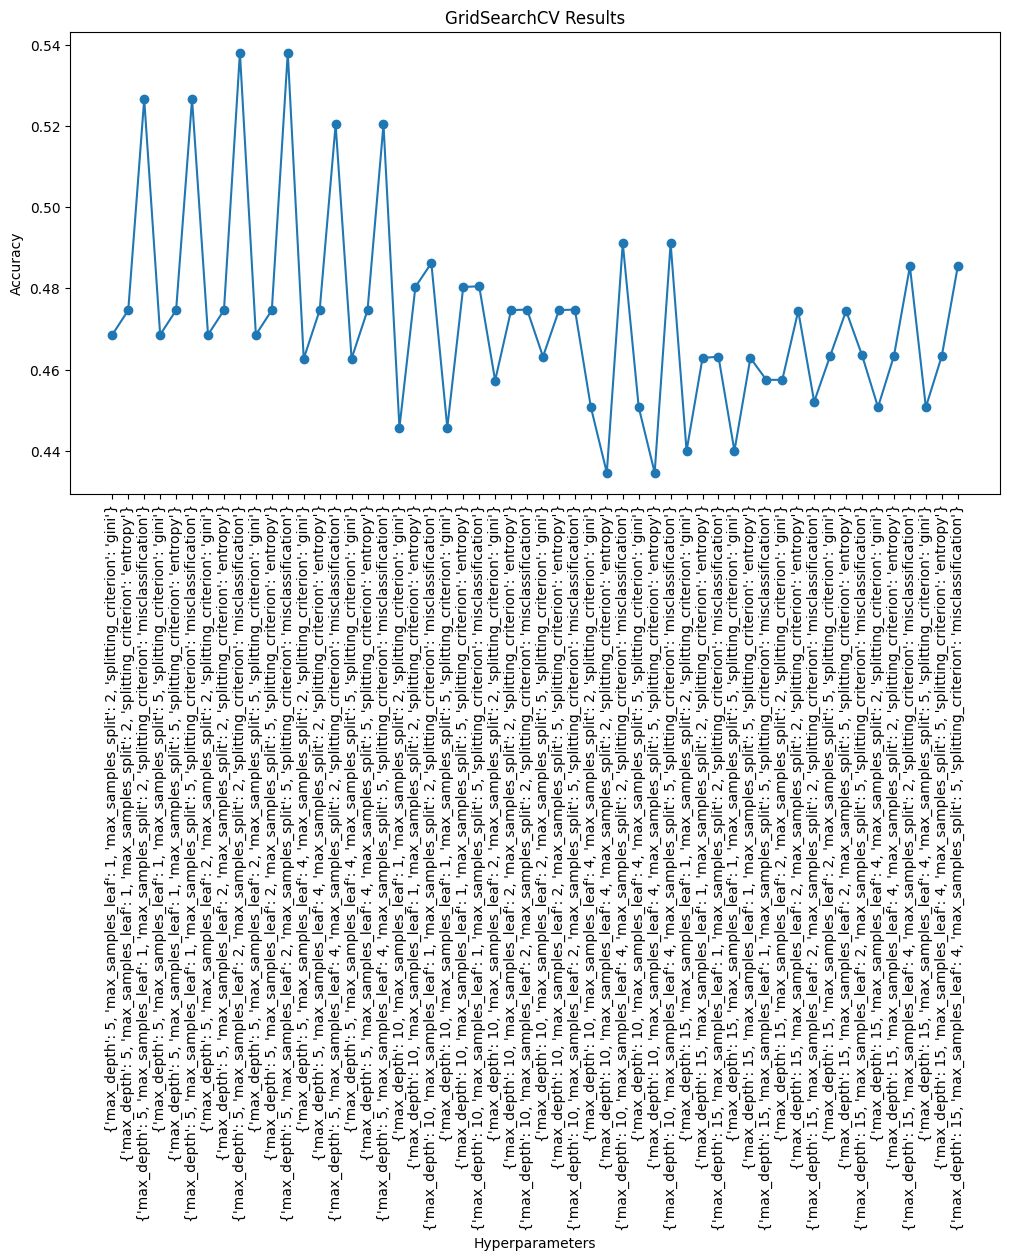

In [14]:
primary_df_without_changes = pd.read_csv('/content/primary_data.csv', sep=';')

param_grid = {
    "max_depth": [5, 10, 15],
    "max_samples_split": [2, 5],
    "max_samples_leaf": [1, 2, 4],
    "splitting_criterion": ["gini", "entropy", "misclassification"]
}

X_train = primary_df_without_changes.drop(columns=['class'])
y_train = primary_df_without_changes['class']

tqdm_grid_search = TqdmGridSearchCV(
    PipelineTreePredictor(),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy"
)

tqdm_grid_search.fit(X_train, y_train)

print("Best Parameters:", tqdm_grid_search.best_params_)
plot_grid_search_results(tqdm_grid_search)


## Model Performance Evaluation

Model performance was evaluated using 5-fold cross-validation to ensure reliable results and avoid overfitting. Cross-validation provides a better estimate of how the model generalizes to unseen data.

### Overfitting

Overfitting was observed when the tree depth was increased, as the model performed well on training data but poorly on test data. This is due to the model becoming too specific to the training set.

To combat overfitting, the following strategies were applied:

1. **Limit Tree Depth**: Setting a maximum depth prevents the tree from growing too deep and overfitting.
2. **Minimum Samples in Leaf**: This limits how many samples a leaf can contain, avoiding overly specific splits.

### Underfitting

If the tree's depth was too shallow, the model exhibited underfitting, meaning it didn't capture enough patterns in the data. This was addressed by adjusting the maximum depth and minimum samples per split.


## Possible Improvements

- **Tree Pruning**: To reduce overly complex trees and improve generalization.
- **Random Forests**: Implementing Random Forests would enhance the model’s performance by using an ensemble of decision trees and reducing the variance in predictions.

## Conclusion

This project demonstrated the use of decision trees for binary classification. The implemented splitting criteria and stopping conditions helped manage overfitting and underfitting. Hyperparameter tuning further optimized the model’s performance. The results showed that decision trees are effective, but their performance can be improved with techniques like pruning or ensemble methods such as **Random Forests**, which often perform better by averaging multiple trees to reduce variance.
